This project involves analyzing a Zomato dummy dataset to extract six meaningful insights.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



First, we read the CSV file using pd.read_csv(). Then, with the help of df.head(), we display the first five rows of the dataset along with its structure and columns.


In [25]:
df = pd.read_csv("zomato_dummy_dataset.csv")
print(df.head())

           name    location online_order book_table  rate  votes  \
0  Restaurant_1  HSR Layout           No        Yes   4.2   2751   
1  Restaurant_2   Jayanagar          Yes        Yes   4.3   1021   
2  Restaurant_3  Whitefield          Yes         No   3.0   1216   
3  Restaurant_4   Jayanagar           No        Yes   3.9   4979   
4  Restaurant_5   Jayanagar           No        Yes   4.2   2824   

   approx_cost(for two people)  cuisines listed_in(type)  
0                          700  Desserts     Fine Dining  
1                          600   Mexican           Cafes  
2                          500   Mexican     Quick Bites  
3                          300   Chinese           Cafes  
4                          300   Italian     Quick Bites  


The df.info() function displays each column’s name, the non-null count (how many values are not missing), and the data type (e.g., int, float, object). This helps in quickly detecting columns that have missing values.

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         100 non-null    object 
 1   location                     100 non-null    object 
 2   online_order                 100 non-null    object 
 3   book_table                   100 non-null    object 
 4   rate                         100 non-null    float64
 5   votes                        100 non-null    int64  
 6   approx_cost(for two people)  100 non-null    int64  
 7   cuisines                     100 non-null    object 
 8   listed_in(type)              100 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB
None


By using df.describe(), we can understand the statistical behavior of our data.

In [27]:
print(df.describe())

             rate        votes  approx_cost(for two people)
count  100.000000   100.000000                   100.000000
mean     3.805000  2626.510000                   607.000000
std      0.712993  1396.456696                   230.614024
min      2.500000    54.000000                   300.000000
25%      3.200000  1413.750000                   400.000000
50%      3.750000  2769.500000                   600.000000
75%      4.400000  3781.500000                   800.000000
max      5.000000  4983.000000                  1000.000000


Till now we collect all data and get a short brief from the above function. Now lets move toward Data cleaning which is most important in Data Analysis

1) Check for missing values

In [28]:
df.isnull().sum()

name                           0
location                       0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
cuisines                       0
listed_in(type)                0
dtype: int64

2) Remove duplicates

In [36]:
df.drop_duplicates(inplace=True)

3) Clean text data

In [37]:
df['name'] = df['name'].str.strip().str.title()

Now lets moves toward our output means towards our insights

1) Number of restaurants per city by Count plot

          City  Number of Restaurants
0   HSR Layout                     26
1  Koramangala                     21
2    Jayanagar                     19
3  Indiranagar                     18
4   Whitefield                     16


C:\Users\SANCHIT AWACHAR\AppData\Local\Temp\ipykernel_23560\2828264600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location', order=df['location'].value_counts().index, palette='viridis')


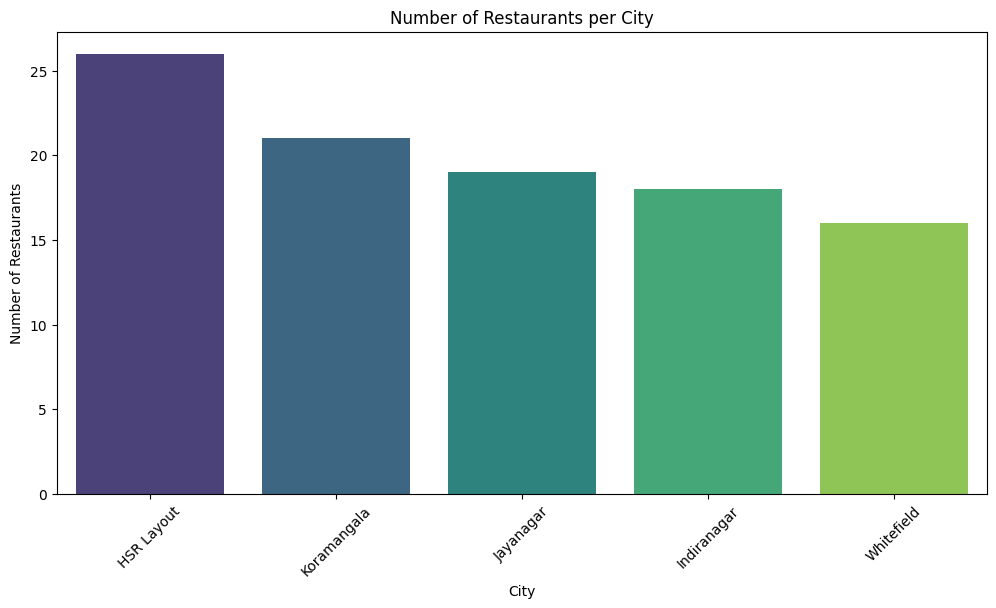

In [59]:
city_counts = df['location'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Restaurants']
print(city_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index, palette='viridis')

plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per City')
plt.show()

2) Average cost for two per city by using value.count function to count top 5 cuisenes in restaraunt using bar graph

Top 5 Cuisines Based on Count:
cuisines
Mexican         20
Desserts        16
Italian         15
South Indian    14
North Indian    13
Name: count, dtype: int64


C:\Users\SANCHIT AWACHAR\AppData\Local\Temp\ipykernel_23560\1370423939.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


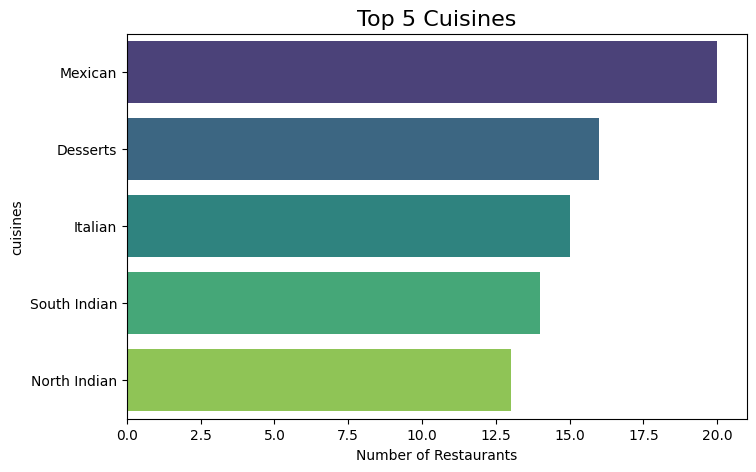

In [42]:
top_cuisines = df['cuisines'].value_counts().head(5)

print("Top 5 Cuisines Based on Count:")
print(top_cuisines)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 5 Cuisines", fontsize=16)
plt.xlabel("Number of Restaurants")
plt.ylabel("cuisines")
plt.show()

3)  Average cost for two peeople per city of 10 location with table and  graph

Average Cost for Two per Location:
location
HSR Layout     665.384615
Koramangala    652.380952
Whitefield     600.000000
Jayanagar      547.368421
Indiranagar    538.888889
Name: approx_cost(for two people), dtype: float64


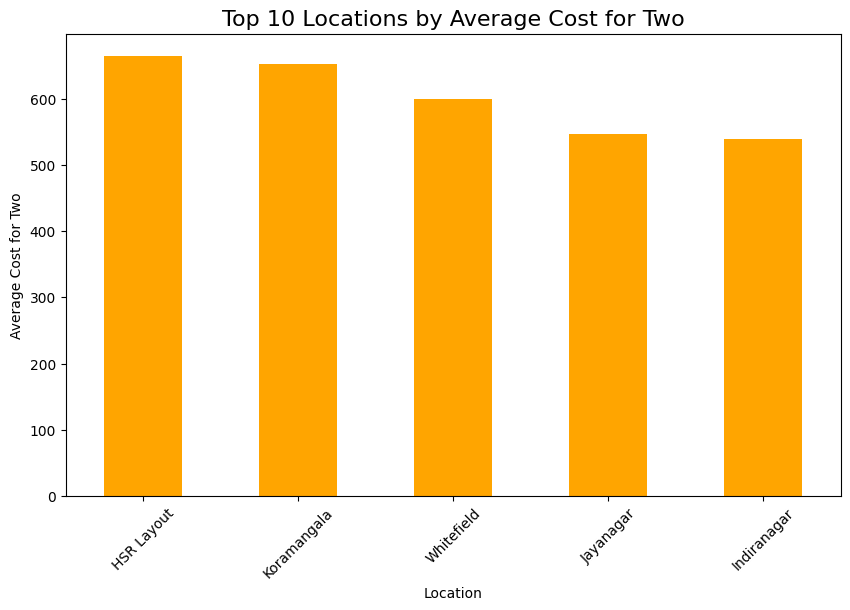

In [47]:
avg_cost_location = df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)

print("Average Cost for Two per Location:")
print(avg_cost_location)

plt.figure(figsize=(10,6))
avg_cost_location.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Locations by Average Cost for Two", fontsize=16)
plt.xlabel("Location")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45)
plt.show()



4)  Restaurant ratings distribution by using Histogram printing average rating at below

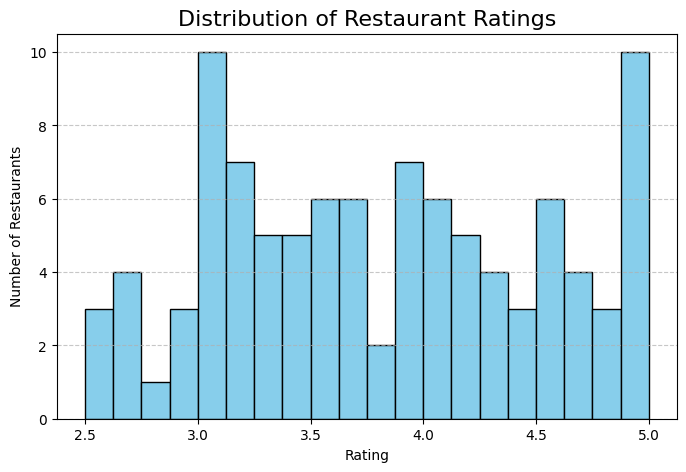

Average Rating across restaurants: 3.81


In [48]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df_clean = df.dropna(subset=['rate'])

plt.figure(figsize=(8,5))
plt.hist(df_clean['rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

avg_rating = df_clean['rate'].mean()
print(f"Average Rating across restaurants: {avg_rating:.2f}")


5) Correlation between cost and rating  by using scatter plot.

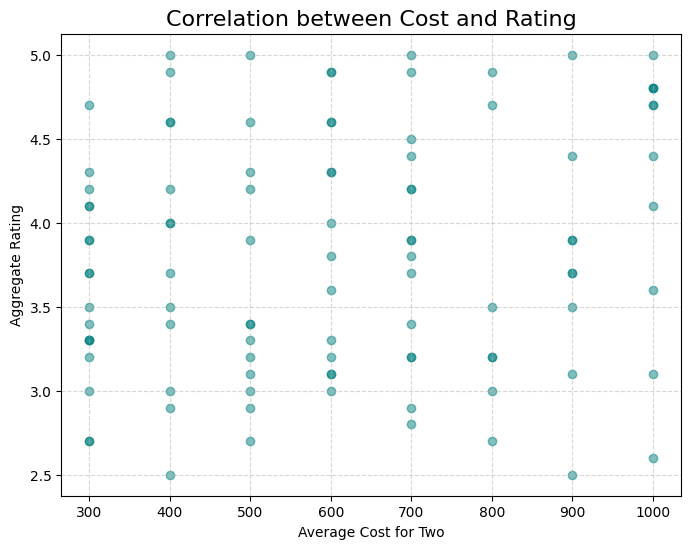

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(df['approx_cost(for two people)'], df['rate'], alpha=0.5, color='teal')
plt.title("Correlation between Cost and Rating", fontsize=16)
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


6) Top 10 restaurants with highest ratings by using bar plot

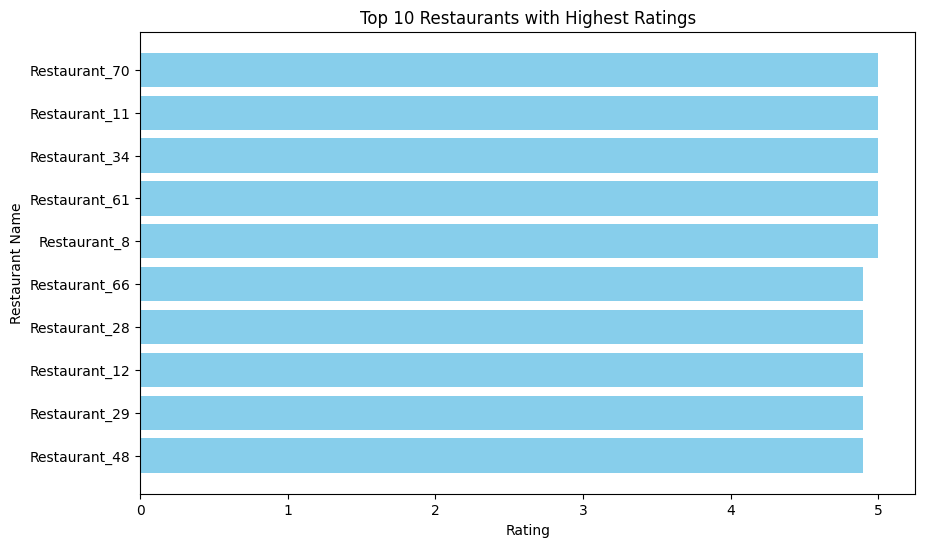

In [55]:
top_10_restaurants = df.sort_values(by='rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_restaurants['name'], top_10_restaurants['rate'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Highest Ratings')
plt.gca().invert_yaxis()  # So highest rating appears on top
plt.show()